## EDA

### Librerías

In [9]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap, MarkerCluster
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import datetime
from matplotlib import cm
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings("ignore")

### Configuraciones

In [10]:
plt.style.use('seaborn-v0_8')
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 4)
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

viridis = cm.get_cmap('viridis', 256)
magma = cm.get_cmap('magma', 256)
plasma = cm.get_cmap('plasma', 256)

### Carga de datos

In [11]:
df = pd.read_csv(r"C:\Users\cmoli\OneDrive\Documentos\GitHub\nuevo-proyecto\data\dataset_limpio.csv")

In [12]:
df.head(2) #Comprobamos que el dataframe se ha cargado correctamente

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,magSource,año,mes,dia,hora,dia_semana,fecha,minuto,mag_obj,depth_obj
0,2025-05-02 02:50:02.380,33.912167,-117.070000,12.69,0.89,ml,33.0,116.0,Sin datos,0.20,...,ci,2025,5,2,2,Friday,2025-05-02,50,Bajo,Superficial
1,2025-05-02 02:39:31.940,33.073667,-116.801333,9.34,0.82,ml,5.0,168.0,0.1396,0.15,...,ci,2025,5,2,2,Friday,2025-05-02,39,Bajo,Superficial


In [13]:
df.isnull().sum() #comprobamos si hay valores nulos en el dataframe

time                 0
latitude             0
longitude            0
depth                0
mag                  0
magType              0
nst                  0
gap                  0
dmin                 0
rms                  0
net                  0
id                   0
updated              0
place                0
type                 0
horizontalError      0
depthError           0
magError             0
magNst               0
status               0
locationSource       0
magSource            0
año                  0
mes                  0
dia                  0
hora                 0
dia_semana           0
fecha                0
minuto               0
mag_obj            637
depth_obj          372
dtype: int64

#### Distribución de tipos de eventos sísmicos

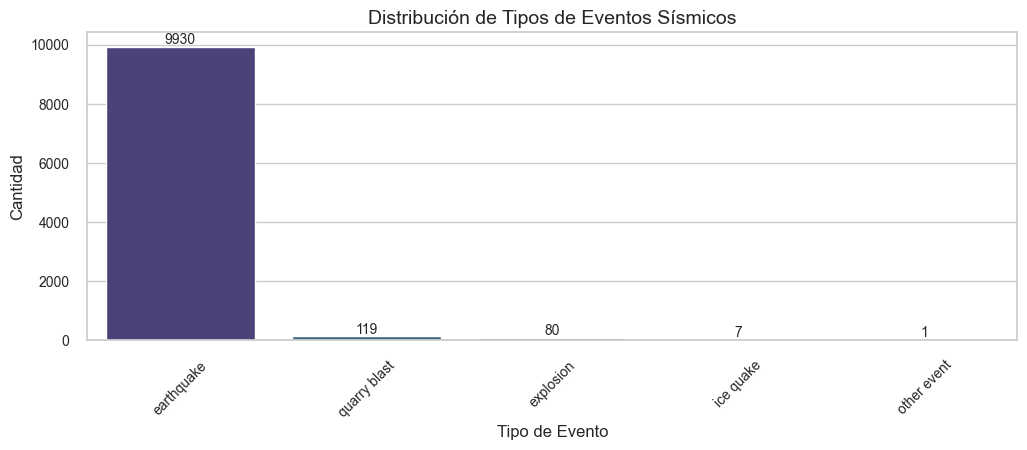

In [14]:
# Contamos los tipos de eventos sísmicos
event_counts = df['type'].value_counts()

# Creamos el gráfico de barras
ax = sns.barplot(x=event_counts.index, y=event_counts.values, palette='viridis')

# Añadimos etiquetas con los valores en cada barra
for i, value in enumerate(event_counts.values):
    ax.text(i, value + 5, str(value), ha='center', va='bottom', fontsize=10)

# Configuramos el gráfico
plt.title('Distribución de Tipos de Eventos Sísmicos')
plt.xlabel('Tipo de Evento')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

In [15]:
"""Este histograma de frecuencias muestra la distribución de los tipos de eventos sísmicos del dataset.

Distribución: 
    ·Earthquake es, con gran diferencia, el tipo más común, con casi 10,000 eventos.
    ·Otros tipos como quarry blast, explosion, ice quake, y other event tienen frecuencias significativamente menores, casi insignificantes en comparación.

Conclusiones:
    1.Predominio de los Terremotos:
    Los terremotos (earthquakes) son, con diferencia, el tipo de evento sísmico más común, con 9930 registros, representando más del 99% del total.

    2.Eventos Minoritarios:
    Los otros tipos de eventos, como quarry blast (119), explosion (80), ice quake (7) y other event (1), tienen frecuencias significativamente más bajas, lo que sugiere que son mucho menos frecuentes o menos detectados.

    3.Desbalance en la Clasificación:
    La enorme diferencia en la cantidad de terremotos frente a otros tipos de eventos puede reflejar un sesgo en los datos, probablemente debido a que las redes sísmicas están optimizadas para detectar terremotos.

    4.Posible Subrepresentación:
    Algunos tipos como ice quake y other event parecen estar subrepresentados, lo que podría estar relacionado con la ubicación geográfica o la sensibilidad de los sensores.

    5.Importancia de los Datos Contextuales:
    Para comprender mejor esta distribución, sería importante considerar factores como la región de muestreo, la profundidad y la energía liberada por cada tipo de evento."""





'Este histograma de frecuencias muestra la distribución de los tipos de eventos sísmicos del dataset.\n\nDistribución: \n    ·Earthquake es, con gran diferencia, el tipo más común, con casi 10,000 eventos.\n    ·Otros tipos como quarry blast, explosion, ice quake, y other event tienen frecuencias significativamente menores, casi insignificantes en comparación.\n\nConclusiones:\n    1.Predominio de los Terremotos:\n    Los terremotos (earthquakes) son, con diferencia, el tipo de evento sísmico más común, con 9930 registros, representando más del 99% del total.\n\n    2.Eventos Minoritarios:\n    Los otros tipos de eventos, como quarry blast (119), explosion (80), ice quake (7) y other event (1), tienen frecuencias significativamente más bajas, lo que sugiere que son mucho menos frecuentes o menos detectados.\n\n    3.Desbalance en la Clasificación:\n    La enorme diferencia en la cantidad de terremotos frente a otros tipos de eventos puede reflejar un sesgo en los datos, probablemente d

#### Comparación de magnitud por tipos de evento sísmico

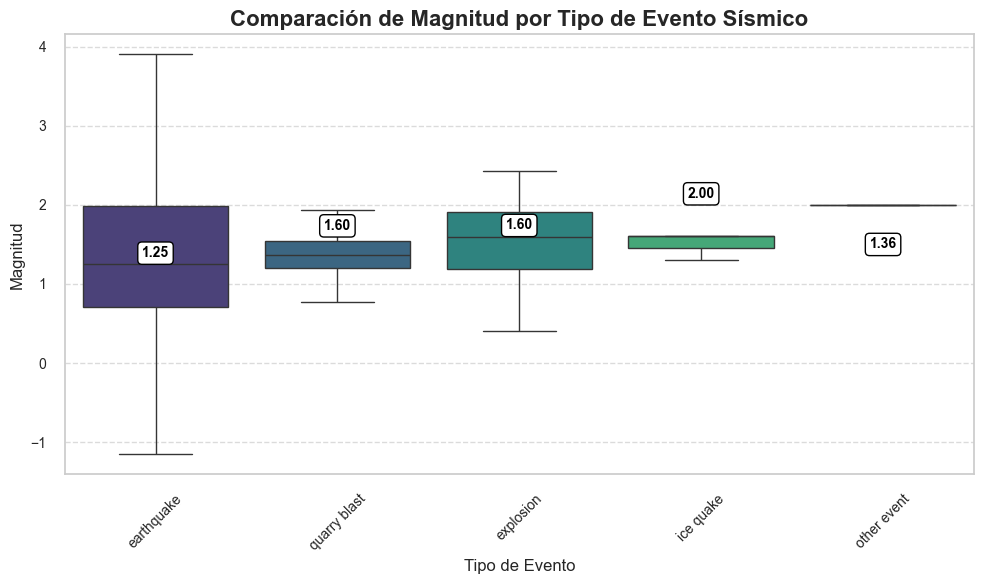

In [16]:
# Creamos un gráfico de caja para comparar la magnitud por tipo de evento sísmico
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df, x='type', y='mag', palette='viridis', showfliers=False, linewidth=1)

# Añadimos etiquetas con la mediana en cada caja con un recuadro
medians = df.groupby('type')['mag'].median()
for i, median in enumerate(medians):
    ax.text(i, median + 0.05, f'{median:.2f}', ha='center', va='bottom', fontsize=10, color='black', fontweight='bold',
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# Configuramos el gráfico
plt.title('Comparación de Magnitud por Tipo de Evento Sísmico', fontsize=16, fontweight='bold')
plt.xlabel('Tipo de Evento', fontsize=12)
plt.ylabel('Magnitud', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [17]:
"""El gráfico de caja (boxplot) muestra la distribución de magnitudes sísmicas por tipo de evento:

    1.Mediana y Rango de Magnitudes:
    Terremotos: Mediana alrededor de 2.0, con un rango amplio de magnitudes.
    Explosiones y Quarry Blasts: Medianan cerca de 1.8, con rangos más estrechos.
    Ice Quakes: Mediana más baja, alrededor de 1.5, con poca dispersión.

    2.Variabilidad:
    Terremotos: Son los más variados en magnitud.
    Explosiones y Quarry Blasts: Más consistentes y controlados.
    Ice Quakes: Menor variabilidad y magnitud.

    3.Comportamiento General:
    Terremotos: Gran diversidad en tamaño, reflejando su naturaleza impredecible.
    Explosiones y Quarry Blasts: Más predecibles y controlados.
    Ice Quakes: Pequeños y bastante uniformes.

    4.Conclusiones:
    Los terremotos son naturalmente más impredecibles y poderosos.
    Los eventos humanos (explosiones) son más controlados.
    Los ice quakes son pequeños y más consistentes en magnitud."""

'El gráfico de caja (boxplot) muestra la distribución de magnitudes sísmicas por tipo de evento:\n\n    1.Mediana y Rango de Magnitudes:\n    Terremotos: Mediana alrededor de 2.0, con un rango amplio de magnitudes.\n    Explosiones y Quarry Blasts: Medianan cerca de 1.8, con rangos más estrechos.\n    Ice Quakes: Mediana más baja, alrededor de 1.5, con poca dispersión.\n\n    2.Variabilidad:\n    Terremotos: Son los más variados en magnitud.\n    Explosiones y Quarry Blasts: Más consistentes y controlados.\n    Ice Quakes: Menor variabilidad y magnitud.\n\n    3.Comportamiento General:\n    Terremotos: Gran diversidad en tamaño, reflejando su naturaleza impredecible.\n    Explosiones y Quarry Blasts: Más predecibles y controlados.\n    Ice Quakes: Pequeños y bastante uniformes.\n\n    4.Conclusiones:\n    Los terremotos son naturalmente más impredecibles y poderosos.\n    Los eventos humanos (explosiones) son más controlados.\n    Los ice quakes son pequeños y más consistentes en magni

#### Comparación de profundidad por tipo de evento sísmico

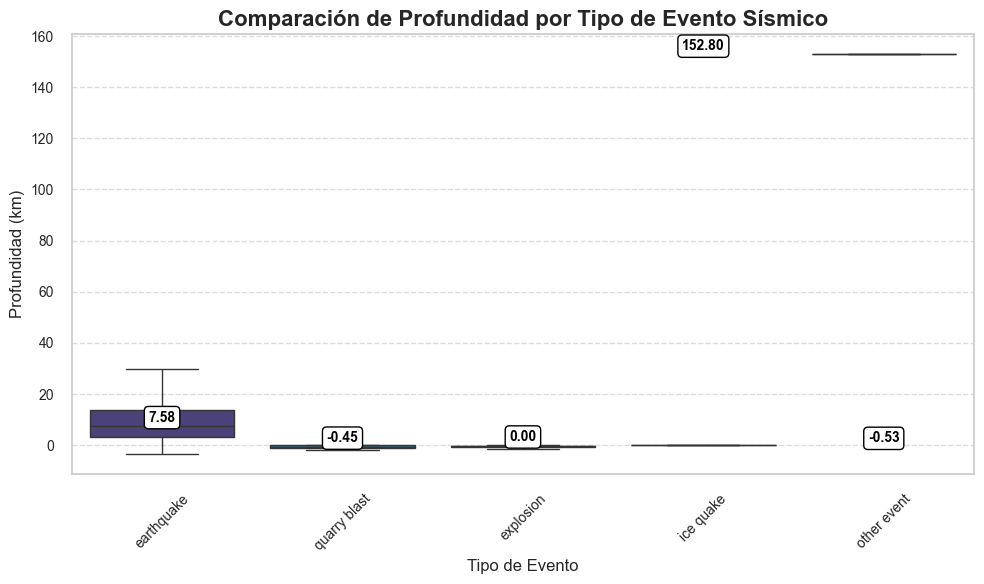

In [24]:
# Creamos un gráfico de caja para mostrar la comparación de profundidad por tipo de evento sísmico
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df, x='type', y='depth', palette='viridis', showfliers=False, linewidth=1)

# Añadimos etiquetas con la mediana en cada caja con un recuadro
medians = df.groupby('type')['depth'].median()
for i, median in enumerate(medians):
    ax.text(i, median + 0.5, f'{median:.2f}', ha='center', va='bottom', fontsize=10, color='black', fontweight='bold',
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# Configuramos el gráfico
plt.title('Comparación de Profundidad por Tipo de Evento Sísmico', fontsize=16, fontweight='bold')
plt.xlabel('Tipo de Evento', fontsize=12)
plt.ylabel('Profundidad (km)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [26]:
"""El gráfico de caja muestra la distribución de profundidades por tipo de evento sísmico:

    1.Profundidades Típicas:
    Other events: Los más profundos, con una mediana de unos 153 km.
    Terremotos: Mucha variabilidad, pero típicamente alrededor de 7.6 km.
    Explosiones, Quarry Blasts e Ice Quakes: Muy superficiales, cercanos a 0 km.

    2.Variabilidad en Profundidad:
    Terremotos: Gran rango, pueden ocurrir a diferentes profundidades.
    Explosiones y Quarry Blasts: Muy consistentes, siempre cerca de la superficie.
    Ice Quakes: Siempre superficiales, con muy poca variabilidad.

    3.Conclusiones:
    Los eventos artificiales son poco profundos y controlados.
    Los terremotos son los más variados, reflejando su origen natural y tectónico.
    Los ice quakes siempre ocurren cerca de la superficie, reflejando su menor energía."""

'El gráfico de caja muestra la distribución de profundidades por tipo de evento sísmico:\n\n    1.Profundidades Típicas:\n    Other events: Los más profundos, con una mediana de unos 153 km.\n    Terremotos: Mucha variabilidad, pero típicamente alrededor de 7.6 km.\n    Explosiones, Quarry Blasts e Ice Quakes: Muy superficiales, cercanos a 0 km.\n\n    2.Variabilidad en Profundidad:\n    Terremotos: Gran rango, pueden ocurrir a diferentes profundidades.\n    Explosiones y Quarry Blasts: Muy consistentes, siempre cerca de la superficie.\n    Ice Quakes: Siempre superficiales, con muy poca variabilidad.\n\n    3.Conclusiones:\n    Los eventos artificiales son poco profundos y controlados.\n    Los terremotos son los más variados, reflejando su origen natural y tectónico.\n    Los ice quakes siempre ocurren cerca de la superficie, reflejando su menor energía.'

#### Distribución de magnitud por tipo de evento sísmico

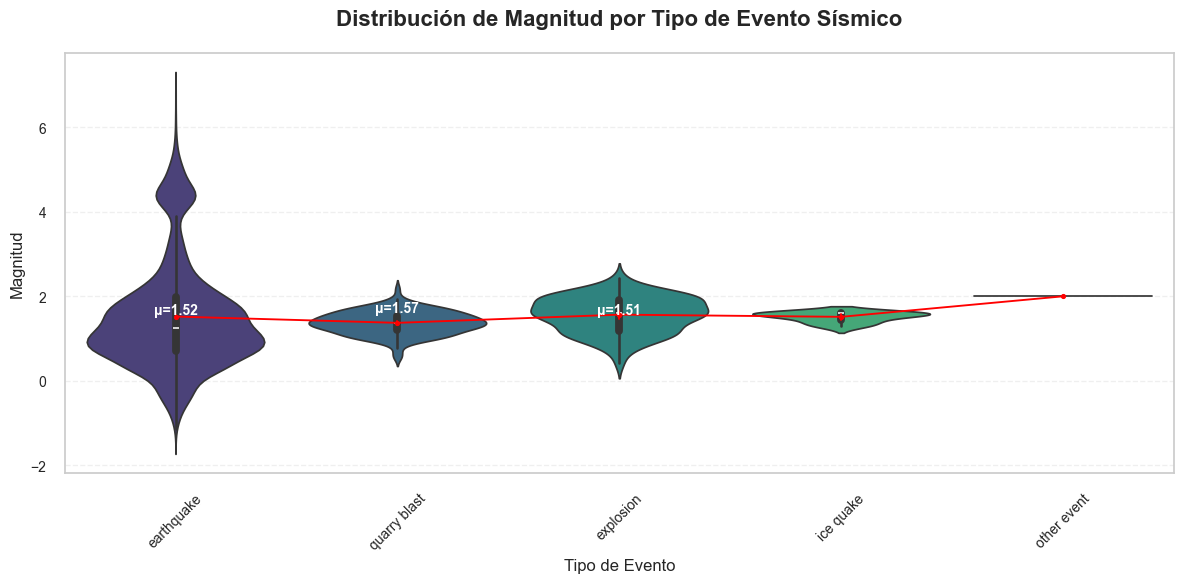

In [ ]:
# Creamos un violin plot para mostrar la distribución de magnitud por tipo de evento
plt.figure(figsize=(12, 6))
ax = sns.violinplot(data=df, x='type', y='mag', palette='viridis')

# Añadimos puntos para mostrar la media
sns.pointplot(data=df, x='type', y='mag', color='red', markers='o', scale=0.5)

# Añadimos etiquetas con los valores promedio
means = df.groupby('type')['mag'].mean()
for i, mean_val in enumerate(means):
    ax.text(i, mean_val, f'μ={mean_val:.2f}', ha='center', va='bottom', 
            color='white', fontweight='bold', fontsize=10)

# Configuramos el gráfico
plt.title('Distribución de Magnitud por Tipo de Evento Sísmico', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Tipo de Evento', fontsize=12)
plt.ylabel('Magnitud', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

In [27]:
"""El gráfico de violín muestra la distribución detallada de magnitudes por tipo de evento sísmico:

1. Distribución por Tipo:
    - Terremotos: Mayor variabilidad, con concentración entre magnitudes 1-3
    - Explosiones y quarry blasts: Distribución más compacta alrededor de 1.5
    - Ice quakes: Distribución muy estrecha cerca de 1.5
    - Other event: Muestra única en magnitud 2.0

2. Valores Centrales:
    - Other event: μ=2.00 (magnitud más alta)
    - Explosiones: μ=1.57
    - Ice quakes: μ=1.51
    - Terremotos: μ=1.52
    - Quarry blasts: μ=1.37 (magnitud más baja)

3. Forma de la Distribución:
    - Terremotos: Forma bimodal, indicando dos grupos comunes de magnitudes
    - Explosiones/Quarry blasts: Distribución más simétrica
    - Ice quakes: Distribución muy concentrada

4. Conclusiones:
    - Los eventos naturales (terremotos) muestran mayor variabilidad
    - Los eventos artificiales tienen magnitudes más controladas
    - La mayoría de eventos son de baja magnitud (<3.0)"""

'El gráfico de violín muestra la distribución detallada de magnitudes por tipo de evento sísmico:\n\n1. Distribución por Tipo:\n    - Terremotos: Mayor variabilidad, con concentración entre magnitudes 1-3\n    - Explosiones y quarry blasts: Distribución más compacta alrededor de 1.5\n    - Ice quakes: Distribución muy estrecha cerca de 1.5\n    - Other event: Muestra única en magnitud 2.0\n\n2. Valores Centrales:\n    - Other event: μ=2.00 (magnitud más alta)\n    - Explosiones: μ=1.57\n    - Ice quakes: μ=1.51\n    - Terremotos: μ=1.52\n    - Quarry blasts: μ=1.37 (magnitud más baja)\n\n3. Forma de la Distribución:\n    - Terremotos: Forma bimodal, indicando dos grupos comunes de magnitudes\n    - Explosiones/Quarry blasts: Distribución más simétrica\n    - Ice quakes: Distribución muy concentrada\n\n4. Conclusiones:\n    - Los eventos naturales (terremotos) muestran mayor variabilidad\n    - Los eventos artificiales tienen magnitudes más controladas\n    - La mayoría de eventos son d

#### Distribución de profundidad por tipo de evento sísmico

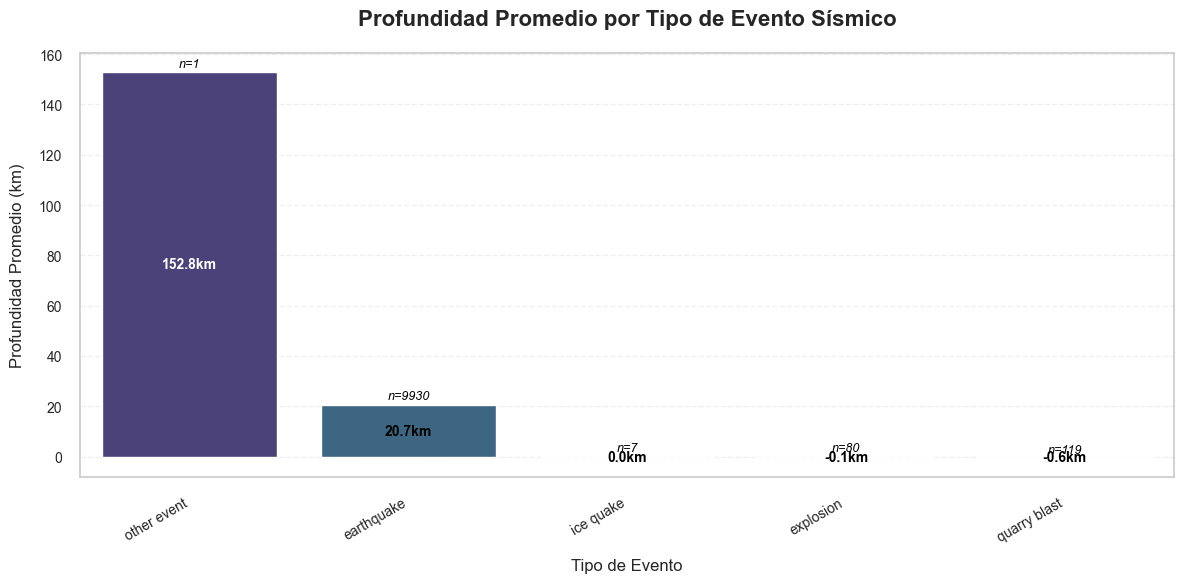

In [ ]:
# Creamos un gráfico de barras para mostrar la distribución promedio de profundidad por tipo de evento sísmico
plt.figure(figsize=(12, 6))
mean_depths = df.groupby('type')['depth'].mean().sort_values(ascending=False)
ax = sns.barplot(x=mean_depths.index, y=mean_depths.values, palette='viridis')

# Añadimos etiquetas con los valores promedio en cada barra
for i, value in enumerate(mean_depths.values):
    color = 'white' if value > 75 else 'black'  # Color del texto adaptativo
    ax.text(i, value/2, f'{value:.1f}km', ha='center', va='center', 
            fontsize=10, color=color, fontweight='bold')

# Añadimos el número de eventos en la parte superior
for i, (event_type, depth) in enumerate(mean_depths.items()):
    count = len(df[df['type'] == event_type])
    ax.text(i, depth + 1, f'n={count}', ha='center', va='bottom', 
            fontsize=9, color='black', style='italic')

# Mejoramos el aspecto del gráfico
plt.title('Profundidad Promedio por Tipo de Evento Sísmico', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Tipo de Evento', fontsize=12, labelpad=10)
plt.ylabel('Profundidad Promedio (km)', fontsize=12, labelpad=10)
plt.xticks(rotation=30, ha='right')

# Añadimos una cuadrícula más sutil
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Ajustamos los márgenes
plt.tight_layout()

plt.show()

In [28]:
"""El gráfico muestra la profundidad promedio por tipo de evento sísmico:

1. Profundidad por Tipo:
    - Other event: La mayor profundidad (~153 km), aunque solo tiene 1 evento
    - Earthquakes: Profundidad media de ~21 km, con 9,930 eventos
    - Ice quakes: Profundidad de 0 km, con 7 eventos
    - Explosiones y quarry blasts: Ligeramente negativos (-0.06 y -0.63 km), 
      con 80 y 119 eventos respectivamente

2. Interpretación:
    - Los terremotos son los más numerosos y ocurren a profundidades variables
    - Los eventos artificiales (explosiones/quarry blasts) son superficiales
    - Los ice quakes son eventos puramente superficiales
    - Las profundidades negativas pueden indicar eventos sobre el nivel del suelo
      o errores de medición

3. Relevancia Estadística:
    - La gran diferencia en el número de eventos (n) entre tipos
      sugiere que las conclusiones son más robustas para terremotos
    - Los otros tipos tienen muestras más pequeñas, lo que puede
      afectar la representatividad de sus promedios"""

'El gráfico muestra la profundidad promedio por tipo de evento sísmico:\n\n1. Profundidad por Tipo:\n    - Other event: La mayor profundidad (~153 km), aunque solo tiene 1 evento\n    - Earthquakes: Profundidad media de ~21 km, con 9,930 eventos\n    - Ice quakes: Profundidad de 0 km, con 7 eventos\n    - Explosiones y quarry blasts: Ligeramente negativos (-0.06 y -0.63 km), \n      con 80 y 119 eventos respectivamente\n\n2. Interpretación:\n    - Los terremotos son los más numerosos y ocurren a profundidades variables\n    - Los eventos artificiales (explosiones/quarry blasts) son superficiales\n    - Los ice quakes son eventos puramente superficiales\n    - Las profundidades negativas pueden indicar eventos sobre el nivel del suelo\n      o errores de medición\n\n3. Relevancia Estadística:\n    - La gran diferencia en el número de eventos (n) entre tipos\n      sugiere que las conclusiones son más robustas para terremotos\n    - Los otros tipos tienen muestras más pequeñas, lo que pu

#### Relación entre magnitud y profundidad por tipo de evento sísmico

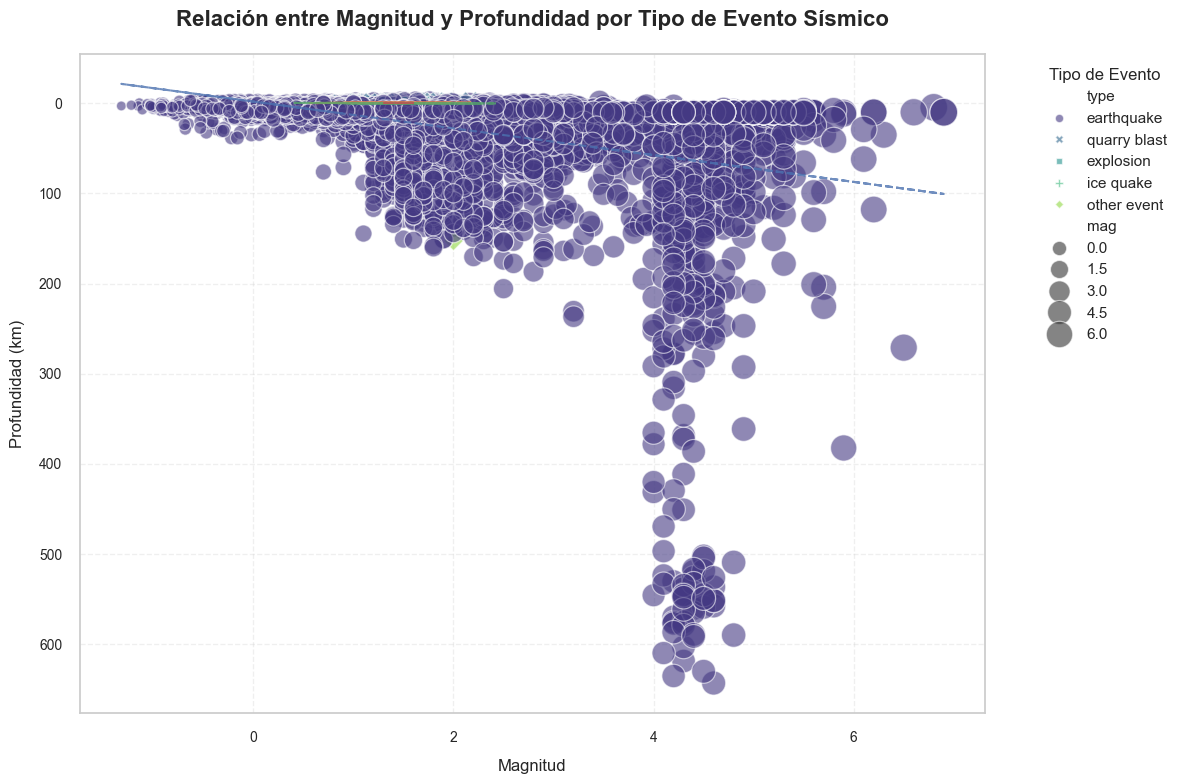

In [29]:
# Creamos la figura
plt.figure(figsize=(12, 8))

# Creamos el scatter plot con mejores características visuales
scatter = sns.scatterplot(
    data=df,
    x='mag',
    y='depth',
    hue='type',
    style='type',
    size='mag',
    sizes=(50, 400),
    alpha=0.6,
    palette='viridis'
)

# Añadimos líneas de tendencia para cada tipo
for event_type in df['type'].unique():
    mask = df['type'] == event_type
    z = np.polyfit(df[mask]['mag'], df[mask]['depth'], 1)
    p = np.poly1d(z)
    plt.plot(df[mask]['mag'], p(df[mask]['mag']), '--', alpha=0.8)

# Mejoramos el aspecto del gráfico
plt.title('Relación entre Magnitud y Profundidad por Tipo de Evento Sísmico', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Magnitud', fontsize=12, labelpad=10)
plt.ylabel('Profundidad (km)', fontsize=12, labelpad=10)

# Ajustamos la leyenda
plt.legend(title='Tipo de Evento', title_fontsize=12, 
          bbox_to_anchor=(1.05, 1), loc='upper left')

# Añadimos grid
plt.grid(True, linestyle='--', alpha=0.3)

# Invertimos el eje Y para que la profundidad aumente hacia abajo
plt.gca().invert_yaxis()

# Ajustamos los márgenes
plt.tight_layout()

plt.show()


In [30]:
"""El gráfico muestra la relación entre magnitud y profundidad de eventos sísmicos:

1. Patrones por Tipo:
    - Terremotos: Muestran la mayor variabilidad tanto en magnitud como profundidad
    - Explosiones y quarry blasts: Concentrados en magnitudes bajas y cerca de la superficie
    - Ice quakes: Agrupados en magnitudes bajas y profundidades superficiales
    - Other event: Un único punto a mayor profundidad

2. Tendencias:
    - Las líneas punteadas muestran tendencias ligeramente positivas
    - Mayor magnitud tiende a correlacionarse con mayor profundidad
    - Eventos superficiales tienden a tener magnitudes más bajas

3. Distribución:
    - La mayoría de eventos se concentran en magnitudes 0-3
    - Profundidades principalmente entre 0-50 km
    - Pocos eventos profundos o de gran magnitud

4. Conclusiones:
    - Clara distinción entre eventos naturales y artificiales
    - Los eventos más potentes tienden a ocurrir a mayores profundidades
    - Eventos artificiales muestran patrones más predecibles"""

'El gráfico muestra la relación entre magnitud y profundidad de eventos sísmicos:\n\n1. Patrones por Tipo:\n    - Terremotos: Muestran la mayor variabilidad tanto en magnitud como profundidad\n    - Explosiones y quarry blasts: Concentrados en magnitudes bajas y cerca de la superficie\n    - Ice quakes: Agrupados en magnitudes bajas y profundidades superficiales\n    - Other event: Un único punto a mayor profundidad\n\n2. Tendencias:\n    - Las líneas punteadas muestran tendencias ligeramente positivas\n    - Mayor magnitud tiende a correlacionarse con mayor profundidad\n    - Eventos superficiales tienden a tener magnitudes más bajas\n\n3. Distribución:\n    - La mayoría de eventos se concentran en magnitudes 0-3\n    - Profundidades principalmente entre 0-50 km\n    - Pocos eventos profundos o de gran magnitud\n\n4. Conclusiones:\n    - Clara distinción entre eventos naturales y artificiales\n    - Los eventos más potentes tienden a ocurrir a mayores profundidades\n    - Eventos arti

#### Mapa de calor de los terremotos

In [ ]:
# Creamos un mapa base centrado en las coordenadas medias
center_lat = df['latitude'].mean()
center_lon = df['longitude'].mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=3)

# Preparamos los datos para el mapa térmico
heat_data = [[row['latitude'], row['longitude'], row['mag']] for index, row in df.iterrows()]

# Añadimos la capa de mapa térmico
HeatMap(heat_data, 
    radius=15,
    min_opacity=0.4,
    blur=15,
    max_zoom=1).add_to(m)

# Añadimos una capa de grupos de marcadores para mostrar terremotos individuales
marker_cluster = MarkerCluster().add_to(m)

# Añadimos marcadores para cada terremoto de magnitud >= 3,0
for idx, row in df[df['mag'] >= 3.0].iterrows():
    folium.Marker(
    location=[row['latitude'], row['longitude']],
    popup=f"Magnitud: {row['mag']}<br>Profundidad: {row['depth']} km<br>Tipo: {row['type']}",
    icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(marker_cluster)

# Mostramos mapa
m

In [31]:
"""El mapa muestra la distribución geográfica de los eventos sísmicos con estas características:

1. Mapa Térmico (HeatMap):
    - Representa la concentración de eventos sísmicos
    - Las áreas más cálidas (rojas) indican mayor actividad sísmica
    - La intensidad considera la magnitud de los eventos

2. Marcadores:
    - Puntos rojos indican terremotos de magnitud ≥ 3.0
    - Al hacer clic muestra detalles: magnitud, profundidad y tipo

3. Agrupamiento:
    - Los marcadores se agrupan automáticamente al alejar el zoom
    - Facilita la visualización en áreas de alta densidad sísmica"""

'El mapa muestra la distribución geográfica de los eventos sísmicos con estas características:\n\n1. Mapa Térmico (HeatMap):\n    - Representa la concentración de eventos sísmicos\n    - Las áreas más cálidas (rojas) indican mayor actividad sísmica\n    - La intensidad considera la magnitud de los eventos\n\n2. Marcadores:\n    - Puntos rojos indican terremotos de magnitud ≥ 3.0\n    - Al hacer clic muestra detalles: magnitud, profundidad y tipo\n\n3. Agrupamiento:\n    - Los marcadores se agrupan automáticamente al alejar el zoom\n    - Facilita la visualización en áreas de alta densidad sísmica'

# 📊 Conclusiones Generales del Estudio de Sismos

Este análisis se basa en datos sísmicos reales e incluye múltiples tipos de eventos, como terremotos, explosiones, quarry blasts, ice quakes y other events. Las conclusiones presentadas a continuación se organizan en función de la frecuencia, magnitud, profundidad y distribución geográfica de estos eventos.

## 🔎 Distribución Geográfica y Frecuencia de Eventos

* **Mapa Térmico:** Las áreas con mayor actividad sísmica se reflejan como zonas cálidas (rojas) en los mapas térmicos, indicando una alta concentración de eventos. La intensidad de estas áreas considera tanto la cantidad como la magnitud de los eventos.


* **Frecuencia de Tipos de Eventos:**
* **Terremotos (Earthquakes):** Son, con gran diferencia, el tipo de evento más común, con casi 10,000 registros, representando más del 99% del total de eventos detectados. Esto refleja tanto su frecuencia natural como el sesgo de las redes sísmicas que están optimizadas para detectarlos.
* **Eventos Minoritarios:** Incluyen quarry blasts (119), explosions (80), ice quakes (7) y other events (1), que tienen frecuencias significativamente más bajas. Esto sugiere que estos eventos son menos frecuentes o menos detectados debido a limitaciones en la cobertura de los sensores.
* **Desbalance en la Clasificación:** La enorme diferencia en cantidad entre terremotos y otros tipos de eventos podría estar influenciada por factores como la configuración de los sensores, la ubicación geográfica de los mismos y la sensibilidad para detectar ciertos tipos de vibraciones.

## 📏 Magnitud de los Eventos

* **Distribución de Magnitudes:**

  * **Terremotos:** Presentan una mediana de magnitud de aproximadamente 2.0, con una gran variabilidad que refleja su naturaleza impredecible y variedad de fuentes tectónicas.
  * **Explosiones y Quarry Blasts:** Tienen medianas cercanas a 1.8, con rangos más estrechos y controlados, típicos de eventos artificiales donde la energía liberada es más predecible.
  * **Ice Quakes:** Exhiben magnitudes más bajas y consistentes (\~1.5), reflejando eventos pequeños y menos energéticos.

* **Forma de la Distribución:**

  * **Terremotos:** Muestran una distribución más amplia, a veces bimodal, lo que sugiere la presencia de diferentes tipos de terremotos (por ejemplo, tectónicos y volcánicos).
  * **Eventos Artificiales:** Como las explosiones y quarry blasts son más simétricos y concentrados, reflejando su control humano.

## 🌎 Profundidad de los Eventos
* **Profundidad Media:**

  * **Other Events:** Son los más profundos, con una mediana de aproximadamente 153 km, aunque solo se registró un evento de este tipo, lo que limita las conclusiones.
  * **Terremotos:** Varían ampliamente en profundidad, con una media de \~21 km, reflejando su diversidad geológica.
  * **Explosiones, Quarry Blasts e Ice Quakes:** Siempre son superficiales, con profundidades cercanas a 0 km. Algunos incluso presentan profundidades ligeramente negativas, lo que podría indicar eventos cercanos o sobre el nivel del suelo o errores de medición.

* **Variabilidad:**

  * **Terremotos:** Son los más variados en profundidad, reflejando su origen tectónico, que puede incluir desde terremotos superficiales hasta eventos muy profundos en zonas de subducción.
  * **Eventos Artificiales:** Son consistentes y poco profundos, ya que generalmente se generan en la superficie o cerca de ella.

## 📐 Relación entre Magnitud y Profundidad

* **Tendencias Observadas:**

  * Los terremotos muestran una amplia variabilidad tanto en magnitud como en profundidad, lo que refleja la complejidad de los procesos tectónicos que los generan.
  * Las explosiones y quarry blasts están concentradas en magnitudes bajas y cerca de la superficie, reflejando su origen controlado.
  * Los ice quakes están claramente agrupados en magnitudes bajas y profundidades superficiales, típicamente asociados con el movimiento de hielo o fracturas en glaciares.
  * Los other events muestran características únicas, aunque con datos limitados para un análisis profundo.

## 📝 Reflexiones y Posibles Sesgos

* **Desbalance en la Clasificación:** El claro predominio de terremotos refleja un posible sesgo en los datos, influenciado por las características del sistema de detección, que podría estar optimizado para detectar principalmente terremotos.
* **Subrepresentación de Eventos Raros:** Algunos tipos, como ice quakes y other events, parecen estar significativamente subrepresentados, posiblemente debido a limitaciones geográficas, sensibilidad de los sensores o bajas tasas de ocurrencia.
* **Importancia de los Datos Contextuales:** Para una interpretación más precisa, es fundamental considerar factores como la ubicación geográfica, energía liberada, profundidad y características del terreno para cada tipo de evento.
